### Handling Models

In [1]:
#import necessary modules, set up the plotting
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,6)
from matplotlib import pyplot as plt
import GPy

### Interacting with the models

The GPy library offers a suite of features designed to facilitate the exploration of model parameter spaces. By default, GPy employs SciPy optimizers to fit models using the model.optimize() method. This process includes mechanisms for 'free' optimization, ensuring that parameters which are naturally positive, such as variances, remain so. These mechanisms extend beyond simple reparameterization, providing more robust and flexible optimization capabilities.
In this tutorial, we will focus on a sparse Gaussian Process (GP) regression model as our example. This example can be found within GPy.examples.regression. Each example in GPy returns an instance of a model class, allowing you to interact with it programmatically. You can initialize a sparse GP regression model using the following command:


In [2]:
m = GPy.examples.regression.sparse_GP_regression_1D(plot=False, optimize=False)
# This line creates a sparse GP regression model without plotting or optimizing it initially, providing a starting point for further exploration of model parameters and behaviors.
print(m)


Name : sparse_gp
Objective : 453.985303197845
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     1.0  |      +ve      |        
  rbf.lengthscale          |     1.0  |      +ve      |        
  Gaussian_noise.variance  |     1.0  |      +ve      |        


### Examining the model parameters
* sparse_gp = This is the identifier for the specific model instance
* Objective : 423.20112196189774 [The objective value represents the current value of the model's log-likelihood (or a related quantity) that the optimization process is trying to maximize or minimize. In the context of GP models, this often corresponds to the negative log marginal likelihood.]
* Number of Parameters : 8 [The number of parameters in the model. This includes both the kernel parameters and the noise variance.]
* Number of Optimization Parameters : 8 [This suggests that all 8 parameters are being optimized. This means that the optimization process is actively adjusting these parameters to improve the model's objective.]
* Updates : True [This indicates that updates are enabled for the model parameters, meaning that during optimization, the parameters are adjusted to find the optimal values.]
### Parameters Details
* inducing_inputs : (5,1) [Represents the inducing inputs, which are a key component in sparse GP models. The shape (5, 1) suggests there are 5 inducing inputs, each with a single feature dimension.]
* rbf.variance: 1.0 [The variance of the radial basis function (RBF) kernel, set to 1.0. This parameter is constrained to be positive (+ve), ensuring it remains valid for the kernel's mathematical properties.]
* rbf.lengthscale: 1.0 [The lengthscale of the RBF kernel, also set to 1.0 and constrained to be positive. The lengthscale controls the smoothness of the function being modeled]
* Gaussian_noise.variance: 1.0 [The variance of the Gaussian noise in the model, set to 1.0. This parameter models the noise in the observations and is constrained to be positive]
### Constraints and Priors
* Constraints: Parameters marked with +ve are constrained to be positive. This is crucial for parameters like variances, which must be non-negative to be meaningful.
* Priors: No priors are specified for any of the parameters in this output. Priors can be used to incorporate additional information or assumptions about the parameters, but in this case, they are not defined.





### Interacting with the model parameters
* m.rbf.lengthscale = 0.2: This line sets the lengthscale parameter of the Radial Basis Function (RBF) kernel within the model m to 0.2. The lengthscale is a crucial hyperparameter in Gaussian Process models that influences the smoothness of the function being modeled. A smaller lengthscale implies that the function varies more rapidly with changes in input, while a larger lengthscale indicates a smoother function with slower variation.
* print(m): This command outputs the current state of the model m to the console. After changing the lengthscale, printing the model will show the updated value of the lengthscale parameter, along with other model parameters and the log-likelihood. This allows you to observe how the adjustment affects the model's configuration and performance metrics, such as the log-likelihood, which reflects the model's fit to the data.

In [3]:
m.rbf.lengthscale = 0.2
print(m)


Name : sparse_gp
Objective : 616.2494812752713
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     1.0  |      +ve      |        
  rbf.lengthscale          |     0.2  |      +ve      |        
  Gaussian_noise.variance  |     1.0  |      +ve      |        


### Key Differences
* Objective Value:
  * The objective value has increased from 423.20112196189774 to 574.7605391209007. This suggests that the model's fit to the data has improved, as indicated by the higher log-likelihood value.
* RBF Lengthscale:
  * The rbf.lengthscale parameter has changed from 1.0 to 0.2. This adjustment reflects a change in the model's assumptions about the smoothness of the underlying function. A shorter lengthscale implies the model expects more rapid changes in the function values with respect to the input variables.


### Accessing Model Parameters with Regular Expressions

We can access the model's parameters using regular expressions by indexing the model with a pattern that matches the parameter names. This method allow to retrieve only the leaf nodes of the parameter hierarchy. Once we have indexed the model with a regular expression, you can call values() on the returned object to obtain the matched parameter values.
This approach is particularly useful for efficiently querying and manipulating specific groups of parameters within complex models.

In [4]:
print("Values of '.*var':", m['.*var'])
# m['.*var']: This line uses a regular expression .*var to index the model m. The pattern .*var matches any parameter whose name contains the substring "var". In this context, it matches parameters related to variance.

#print "variances as a np.array:", m['.*var'].values()
#print "np.array of rbf matches: ", m['.*rbf'].values()

Values of '.*var':   index  |             sparse_gp.rbf.variance  |  constraints  |  priors
  [0]    |                         1.00000000  |      +ve      |        
  -----  |  sparse_gp.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                         1.00000000  |      +ve      |        


•	index: The index indicates the position of the parameter in the list of matched parameters. Here, both parameters are indexed as [0], which might be a formatting artifact, indicating that they are distinct entries in the list of parameters.

•	Constraints and Priors: The output shows that both variance parameters are constrained to be positive, which is typical for variance parameters to ensure they remain meaningful (i.e., non-negative). No prior distributions are specified for these parameters, meaning no additional probabilistic assumptions are applied to them.


In [5]:
m['.*var'] = 2.
print(m)
m['.*var'] = [2., 3.]
print(m)


Name : sparse_gp
Objective : 713.7767289994858
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     2.0  |      +ve      |        
  rbf.lengthscale          |     0.2  |      +ve      |        
  Gaussian_noise.variance  |     2.0  |      +ve      |        

Name : sparse_gp
Objective : 727.2941516184464
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     2.0  |      +ve      |        
  rbf.lengthscale          |     0.2  |      +ve      |        
  Gaussian_noise.variance  |     3.0  |      +ve      |        


A useful technique for viewing all the parameters of the model simultaneously is to use a regular expression that matches every parameter.

In [6]:
print(m[''])

  index  |          sparse_gp.inducing_inputs  |  constraints  |  priors
  [0 0]  |                         2.90376524  |               |        
  [1 0]  |                        -2.36596577  |               |        
  [2 0]  |                        -2.25713721  |               |        
  [3 0]  |                        -0.88113056  |               |        
  [4 0]  |                        -1.08866639  |               |        
  -----  |             sparse_gp.rbf.variance  |  -----------  |  ------
  [0]    |                         2.00000000  |      +ve      |        
  -----  |          sparse_gp.rbf.lengthscale  |  -----------  |  ------
  [0]    |                         0.20000000  |      +ve      |        
  -----  |  sparse_gp.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                         3.00000000  |      +ve      |        


### Setting and Fetching Parameters with parameter_array
An alternative method for interacting with the model's parameters is by using the parameter_array. This array consolidates all the model's parameters into a single, editable structure. You can access and modify these parameters by indexing into the model, allowing you to set all parameters efficiently through this array.

In [7]:
new_params = np.r_[[-4,-2,0,2,4], [.1,2], [.7]]
print(new_params)

m[:] = new_params
print(m)    

[-4.  -2.   0.   2.   4.   0.1  2.   0.7]

Name : sparse_gp
Objective : 322.5517139012861
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     0.1  |      +ve      |        
  rbf.lengthscale          |     2.0  |      +ve      |        
  Gaussian_noise.variance  |     0.7  |      +ve      |        


Parameters themselves (leafs of the hierarchy) can be indexed and used the same way as numpy arrays. First let us set a slice of the inducing_inputs:

In [8]:
m.inducing_inputs[2:, 0] = [1,3,5]
print(m.inducing_inputs)

  index  |  sparse_gp.inducing_inputs  |  constraints  |  priors
  [0 0]  |                -4.00000000  |               |        
  [1 0]  |                -2.00000000  |               |        
  [2 0]  |                 1.00000000  |               |        
  [3 0]  |                 3.00000000  |               |        
  [4 0]  |                 5.00000000  |               |        


In [9]:
precision = 1./m.Gaussian_noise.variance
print(precision)

[1.42857143]


### Getting the model parameter's gradients
The gradients of a model can shed light on understanding the (possibly hard) optimization process. The gradients of each parameter handle can be accessed through their gradient field.:

In [10]:
print("all gradients of the model:", m.gradient)
print("gradients of the rbf kernel:", m.rbf.gradient)

all gradients of the model: [   2.11057696    3.86634346    1.39783918   -0.39594168   -0.38656859
  102.04440796  -12.721356   -267.97081835]
gradients of the rbf kernel: [102.04440796 -12.721356  ]


If we optimize the model, the gradients (should be close to) zero.

In [11]:
m.optimize
print(m.gradient)

[   2.11057696    3.86634346    1.39783918   -0.39594168   -0.38656859
  102.04440796  -12.721356   -267.97081835]


### Adjusting the model's constraints
When we initially call the example, it was optimized and hence the log-likelihood gradients were close to zero. However, since we have been changing the parameters, the gradients are far from zero now. Next we are going to show how to optimize the model setting different restrictions on the parameters.

Once a constraint has been set on a parameter, it is possible to remove it with the command unconstrain(), which can be called on any parameter handle of the model. The methods constrain() and unconstrain() return the indices which were actually unconstrained, relative to the parameter handle the method was called on. This is particularly handy for reporting which parameters where reconstrained, when reconstraining a parameter, which was already constrained:

In [12]:
m.rbf.variance.unconstrain()
print(m)


Name : sparse_gp
Objective : 323.5871888944129
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     0.1  |               |        
  rbf.lengthscale          |     2.0  |      +ve      |        
  Gaussian_noise.variance  |     0.7  |      +ve      |        


In [13]:
m.unconstrain('')
print(m)


Name : sparse_gp
Objective : 323.5871888944129
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     0.1  |               |        
  rbf.lengthscale          |     2.0  |      +ve      |        
  Gaussian_noise.variance  |     0.7  |      +ve      |        


If you want to unconstrain only a specific constraint, you can call the respective method, such as unconstrain_fixed() (or unfix()) to only unfix fixed parameters:

In [14]:
m.inducing_inputs[0].fix()
m.rbf.constrain_positive()
print(m)
m.unfix()
print(m)

reconstraining parameters sparse_gp.rbf



Name : sparse_gp
Objective : 323.5871888944129
Number of Parameters : 8
Number of Optimization Parameters : 7
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |    {fixed}    |        
  rbf.variance             |     0.1  |      +ve      |        
  rbf.lengthscale          |     2.0  |      +ve      |        
  Gaussian_noise.variance  |     0.7  |      +ve      |        

Name : sparse_gp
Objective : 323.5871888944129
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     0.1  |      +ve      |        
  rbf.lengthscale          |     2.0  |      +ve      |        
  Gaussian_noise.variance  |     0.7  |      +ve      |        


### Tying parameters

### Optimizing the model
Once we have finished defining the constraints, we can now optimize the model with the function optimize.:

In [15]:
m.Gaussian_noise.constrain_positive()
m.rbf.constrain_positive()
m.optimize

reconstraining parameters sparse_gp.Gaussian_noise
reconstraining parameters sparse_gp.rbf


<bound method SparseGP_MPI.optimize of <GPy.models.sparse_gp_regression.SparseGPRegression object at 0x142bd00b0>>

Some optional parameters may be discussed here.

optimizer: which optimizer to use, currently there are lbfgsb, fmin_tnc, scg, simplex or any unique identifier uniquely identifying an optimizer.
Thus, you can say m.optimize('bfgs') for using the lbfgsb optimizer

messages: if the optimizer is verbose. Each optimizer has its own way of printing, so do not be confused by differing messages of different optimizers
max_iters: Maximum number of iterations to take. Some optimizers see iterations as function calls, others as iterations of the algorithm. Please be advised to look into scipy.optimize for more instructions, if the number of iterations matter, so you can give the right parameters to optimize()
gtol: only for some optimizers. Will determine the convergence criterion, as the tolerance of gradient to finish the optimization.

### Plotting the model

Many of GPys models have built-in plot functionality. we distringuish between plotting the posterior of the function (m.plot_f) and plotting the posterior over predicted data values (m.plot). This becomes especially important for non-Gaussian likleihoods. Here we'll plot the sparse GP model we've been working with. for more information of the meaning of the plot, please refer to the accompanying basic_gp_regression and sparse_gp noteooks.

In [16]:
fig = m.plot()

We can even change the backend for plotting and plot the model using a different backend.

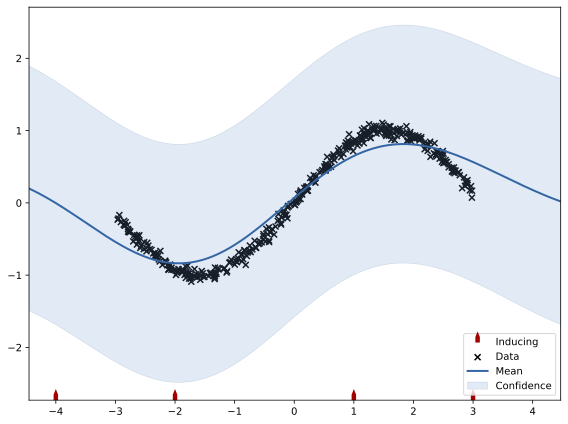

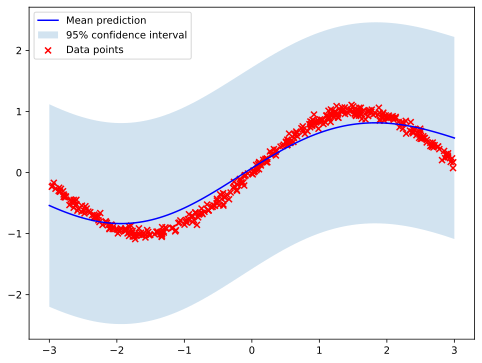

In [17]:
import numpy as np

# Assuming 'm' is a GP regression model
X = np.linspace(-3, 3, 100)[:, None]  # Example input range
mean, variance = m.predict(X)

# Plot using matplotlib
plt.figure()
plt.plot(X, mean, 'b-', label='Mean prediction')
plt.fill_between(X[:, 0], mean[:, 0] - 1.96 * np.sqrt(variance[:, 0]), mean[:, 0] + 1.96 * np.sqrt(variance[:, 0]), alpha=0.2, label='95% confidence interval')
plt.scatter(m.X, m.Y, c='r', marker='x', label='Data points')
plt.legend()
plt.show()


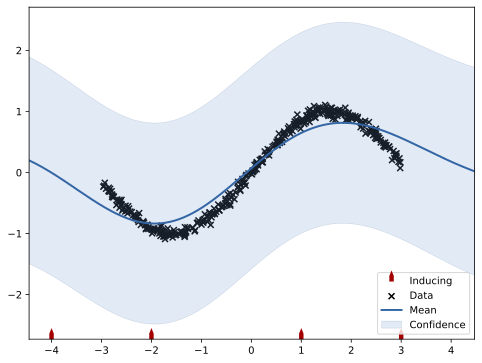

In [18]:
import GPy
import matplotlib.pyplot as plt

# Assuming 'm' is your model
fig, ax = plt.subplots()
m.plot(ax=ax)
plt.show()


### Basic GP regression

In [19]:
import GPy
import plotly.graph_objects as go
import plotly.express as px


We will see in this tutorial the basics for building a 1 dimensional and a 2 dimensional Gaussian process regression model, also known as a kriging model.

In [21]:
import numpy as np

### 1-Dimensional GP regression

For this toy example, we assume we have the following inputs and outputs:

In [22]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

Note that the observations Y include some noise.

The first step is to define the covariance kernel we want to use for the model. We choose here a kernel based on Gaussian kernel (i.e. rbf or square exponential):

In [23]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.) 


The parameter input_dim stands for the dimension of the input space. The parameters variance and lengthscale are optional, and default to 1. Many other kernels are implemented, type GPy.kern.<tab> to see a list

In [24]:
#type GPy.kern.<tab> here:
GPy.kern.BasisFuncKernel

GPy.kern.src.basis_funcs.BasisFuncKernel

In [25]:
m = GPy.models.GPRegression(X,Y,kernel)

By default, some observation noise is added to the model. The functions display and plot give an insight of the model we have just built:

In [26]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [28]:
import plotly.subplots

fig = plotly.subplots.make_subplots(rows=1, cols=1)
print(type(fig))

# fig = plotly.subplots.make_subplots(rows=1, cols=1)
# print(type(fig))


<class 'plotly.graph_objs._figure.Figure'>


In [29]:
import plotly.graph_objects as go
import plotly.io as pio

# Hypothetical data extraction from a non-Plotly object
x_data = [1, 2, 3]
y_data = [4, 5, 6]

# Create a Plotly figure
fig = go.Figure(data=go.Scatter(x=x_data, y=y_data))

# Display the figure
pio.show(fig)


In [30]:
m.optimize(messages=True)

In [31]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = -19.73538559673457
Optimization restart 2/10, f = -19.73538559673497
Optimization restart 3/10, f = -19.735385596684715
Optimization restart 4/10, f = -19.73538559666181
Optimization restart 5/10, f = -19.735385596732804
Optimization restart 6/10, f = -19.73538559670974
Optimization restart 7/10, f = -19.735385596730417
Optimization restart 8/10, f = -19.735385596637492
Optimization restart 9/10, f = -19.735385596727202
Optimization restart 10/10, f = -19.735385596650396


In [35]:
display(m)
import plotly.graph_objects as go

# Display model parameters
display(m)
# Create the GP plot
fig = m.plot()
# Convert to plotly figure and show
fig_plotly = go.Figure(fig[0])
fig_plotly.show()


GP_regression.,value,constraints,priors
rbf.variance,0.8395584968996181,+ve,
rbf.lengthscale,1.782774699506018,+ve,
Gaussian_noise.variance,0.0016261786584921805,+ve,


GP_regression.,value,constraints,priors
rbf.variance,0.8395584968996181,+ve,
rbf.lengthscale,1.782774699506018,+ve,
Gaussian_noise.variance,0.0016261786584921805,+ve,


In [37]:
import GPy
import plotly.graph_objects as go
import numpy as np

# Display model parameters
display(m)

# Create GP plot with density
fig = m.plot(plot_density=True)

# Convert to plotly figure
fig_plotly = go.Figure()

# Add mean line
fig_plotly.add_trace(go.Scatter(
    x=m.X.flatten(),
    y=m.predict(m.X)[0].flatten(),
    mode='lines',
    name='Mean'
))

# Add confidence intervals
mean, variance = m.predict(m.X)
upper = mean + 2*np.sqrt(variance)
lower = mean - 2*np.sqrt(variance)

fig_plotly.add_trace(go.Scatter(
    x=m.X.flatten(),
    y=upper.flatten(),
    fill=None,
    mode='lines',
    line_color='rgba(68, 122, 219, 0.2)',
    name='Upper Bound'
))

fig_plotly.add_trace(go.Scatter(
    x=m.X.flatten(),
    y=lower.flatten(),
    fill='tonexty',
    mode='lines',
    line_color='rgba(68, 122, 219, 0.2)',
    name='Lower Bound'
))

# Add data points
fig_plotly.add_trace(go.Scatter(
    x=m.X.flatten(),
    y=m.Y.flatten(),
    mode='markers',
    name='Data'
))

fig_plotly.update_layout(
    title='GP Regression with Density',
    xaxis_title='X',
    yaxis_title='Y'
)

fig_plotly.show()

GP_regression.,value,constraints,priors
rbf.variance,0.8395584968996181,+ve,
rbf.lengthscale,1.782774699506018,+ve,
Gaussian_noise.variance,0.0016261786584921805,+ve,


### 2-Dimensional GP regression

In [ ]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# Optimize
m.optimize(messages=True,max_f_eval = 1000)

# Plot using matplotlib backend
# Create the GP plot
fig = m.plot()
# Convert to plotly figure and show
fig_plotly = go.Figure(fig[0])
fig_plotly.show()

# Display model parameters
print(m)

# # optimize and plot
# m.optimize(messages=True,max_f_eval = 1000)
# fig = m.plot()
# display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
# display(m)


Name : GP regression
Objective : -21.02400915553103
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  sum.Mat52.variance       |    0.26907810528011505  |      +ve      |        
  sum.Mat52.lengthscale    |                   (2,)  |      +ve      |        
  sum.white.variance       |  0.0007975099904565839  |      +ve      |        
  Gaussian_noise.variance  |  0.0007975099904565839  |      +ve      |        


### The output Analysis.
The dataset is constructed with inputs \(X\) sampled uniformly from \([-3, 3]\) in a 50x2 matrix, and outputs \(Y\) generated as the product of sine functions of the two input dimensions, perturbed by Gaussian noise.

### Kernel definition
The regression model employs a composite kernel combining a Matern 5/2 kernel with Automatic Relevance Determination (ARD) and a White noise kernel. This configuration allows the model to capture smooth variations in the data with flexibility in length scales for each input dimension, while also accounting for noise:
	•	Matern 5/2 Kernel: Known for its ability to model functions that are twice differentiable, providing a balance between smoothness and flexibility.
	•	White Kernel: Models the noise in the data, crucial for ensuring that the GP doesn't overfit to noise.


### Plotting Slices
The objective here is to visualize how the GPR model, previously trained on a two-dimensional dataset, predicts the output variable across varying slices of one input dimension while holding the other dimension constant. This approach provides insights into how the model interpolates and extrapolates data, revealing its predictive behavior and uncertainty.

In [50]:
import plotly.subplots as sp
import plotly.graph_objects as go

fig = sp.make_subplots(rows=3, cols=1, shared_xaxes=True)

for i, y_slice in enumerate(slices):
    x_test = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_test = np.hstack([x_test, np.ones_like(x_test) * y_slice])
    mean, var = m.predict(X_test)
    std = np.sqrt(var)
    
    fig.add_trace(
        go.Scatter(x=x_test.flatten(), y=mean.flatten(), 
                  name=f'Mean at y={y_slice}'),
        row=i+1, col=1
    )
    
    fig.add_trace(
        go.Scatter(x=np.concatenate([x_test.flatten(), x_test.flatten()[::-1]]),
                  y=np.concatenate([mean.flatten() + 2*std.flatten(), 
                                  (mean.flatten() - 2*std.flatten())[::-1]]),
                  fill='toself', opacity=0.2, name=f'95% CI at y={y_slice}'),
        row=i+1, col=1
    )

fig.update_layout(height=800)
fig.show()


### Working with kernels
The aim of this tutorial is to give a better understanding of the kernel objects in GPy and to list the ones that are already implemented. The kernels are the building blocks of the Gaussian processes and they define the prior over the functions that we are going to model. The kernels are implemented in a way that they can be combined to create more complex models.

In [1]:
#configure plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
from matplotlib import pyplot as plt

### A kernel overview

In [2]:
import GPy
import numpy as np

### Basics: Construction, Printing and Plotting 

In this segment of the code, we define multiple Radial Basis Function (RBF) kernels using the GPy library. RBF kernels, also known as Gaussian kernels, are a popular choice in Gaussian Process (GP) modeling due to their smoothness and flexibility in capturing a wide range of function behaviors. Here, we initialize three distinct RBF kernels, each with specific hyperparameters that influence their behavior:

In [3]:
ker1 = GPy.kern.RBF(1)  # Equivalent to ker1 = GPy.kern.rbf(input_dim=1, variance=1., lengthscale=1.)
ker2 = GPy.kern.RBF(input_dim=1, variance = .75, lengthscale=2.)
ker3 = GPy.kern.RBF(1, .5, .5)

In [4]:
print(ker2)

  rbf.         |  value  |  constraints  |  priors
  variance     |   0.75  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |        


In [5]:
_ = ker1.plot(ax=plt.gca())
_ = ker2.plot(ax=plt.gca())
_ = ker3.plot(ax=plt.gca())

### Implemented Kernels

In [6]:
figure, axes = plt.subplots(3,3, figsize=(10,10), tight_layout=True)
kerns = [GPy.kern.RBF(1), GPy.kern.Exponential(1), GPy.kern.Matern32(1), GPy.kern.Matern52(1), GPy.kern.Brownian(1), GPy.kern.Bias(1), GPy.kern.Linear(1), GPy.kern.PeriodicExponential(1), GPy.kern.White(1)]
for k,a in zip(kerns, axes.flatten()):
    k.plot(ax=a, x=1)
    a.set_title(k.name.replace('_', ' '))

### Operations to combine kernels
In GPy, kernel objects can be added or multiplied to create a mutlitude of kernel objects. Parameters and their gradients are handled automatically, and so appear in the combined objects. When kernels are used inside GP objects all the necessary graidents are automagically computed using the chain-rule.

In [8]:
# Product of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_prod = k1 *k2
print(k_prod)
k_prod.plot()



# Sum of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_add = k1 + k2
print(k_add)
k_add.plot()

  mul.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        
  sum.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        


{'covariance': [[<matplotlib.lines.Line2D at 0x136649790>]]}

In [12]:
print(k1)
k_add.rbf.variance = 12.
print(k_add.rbf.variance )
print(k2)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |        
  index  |  sum.rbf.variance  |  constraints  |  priors
  [0]    |       12.00000000  |      +ve      |        
  Mat32.       |  value  |  constraints  |  priors
  variance     |    0.5  |      +ve      |        
  lengthscale  |    0.2  |      +ve      |        


### Operating on different domains

In [13]:
k1 = GPy.kern.Linear(input_dim=1, active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.ExpQuad(input_dim=1, lengthscale=3, active_dims=[1]) # works on the second column of X, index=1
k = k1 * k2
k.plot(x=np.ones((1,2)))

 /Users/anjalisuman/anaconda3/lib/python3.12/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:323: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'covariance': [<matplotlib.contour.QuadContourSet at 0x1363f2ea0>]}

 /var/folders/mq/9smvx9v10lz9nfgprhq0lngw0000gn/T/ipykernel_36932/604267025.py:20: UserWarning:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


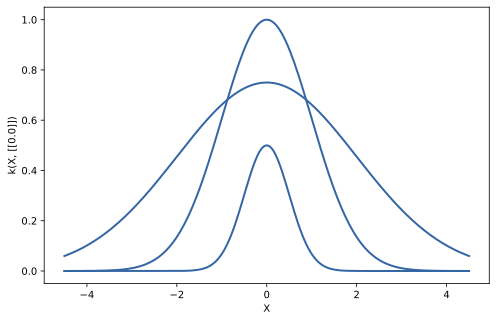

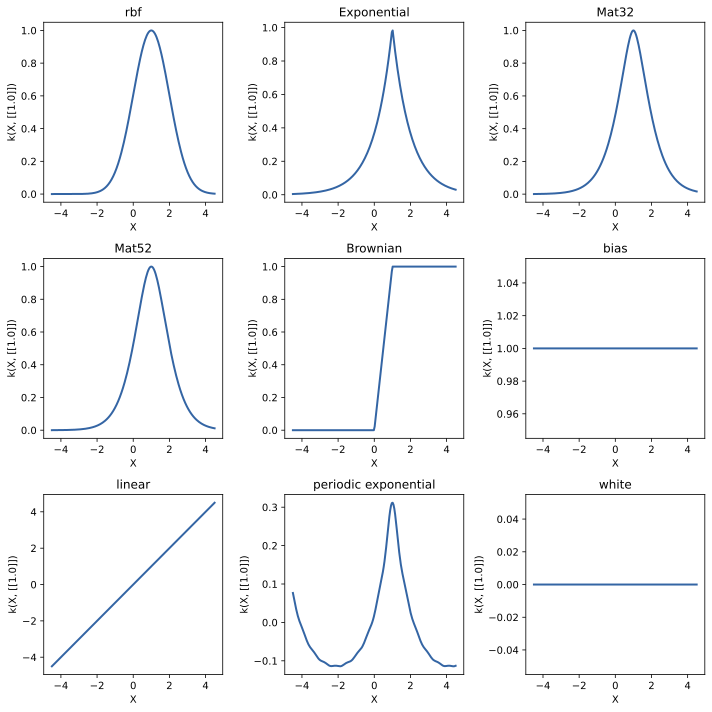

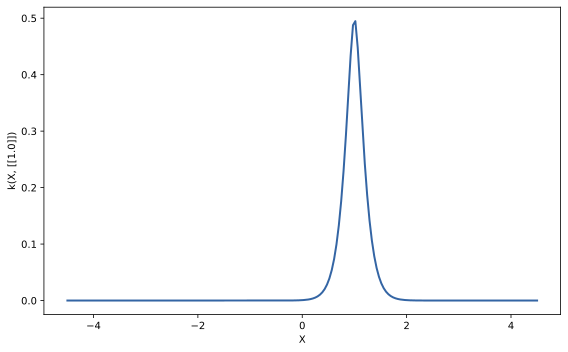

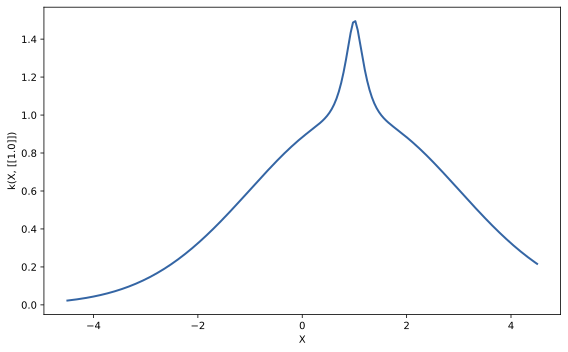

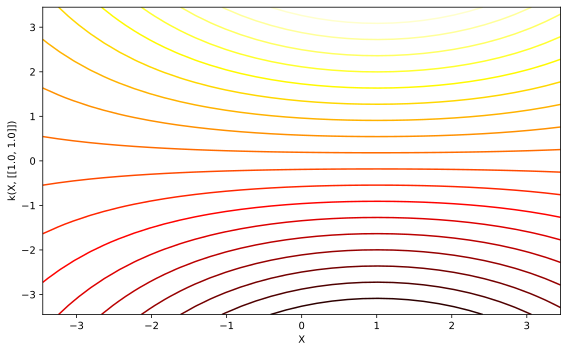

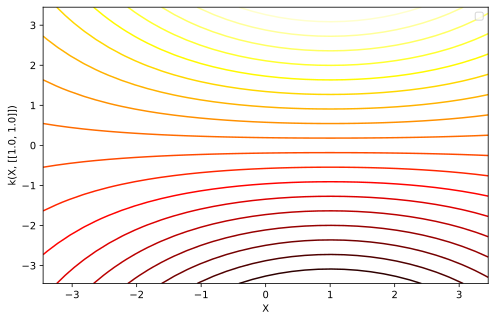

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import GPy

# Define kernels
k1 = GPy.kern.Linear(input_dim=1, active_dims=[0])
k2 = GPy.kern.ExpQuad(input_dim=1, lengthscale=3, active_dims=[1])
k = k1 * k2

# Plot kernel
fig, ax = plt.subplots()
k.plot(x=np.ones((1, 2)), ax=ax)

# Modify plot directly using matplotlib
for line in ax.get_lines():
    line.set_linewidth(2)  # Example: set linewidth
    line.set_label('Kernel Plot')  # Example: set label

# Add legend if needed
ax.legend()

plt.show()


In [15]:
def plot_sample(k):
    xx, yy = np.mgrid[-3:3:30j, -3:3:30j]
    X = np.vstack((xx.flatten(), yy.flatten())).T
    K = k.K(X)
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K)
    #plt.contourf(xx, yy, s.reshape(*xx.shape), cmap=plt.cm.hot)
    plt.imshow(s.reshape(*xx.shape), interpolation='nearest')
    plt.colorbar()
plot_sample(k)

In [16]:
k1 = GPy.kern.PeriodicExponential(input_dim=1, active_dims=[0], period=6, lower=-10, upper=10)# + GPy.kern.Bias(1, variance=0, active_dims=[0])
k2 = GPy.kern.PeriodicExponential(input_dim=1, active_dims=[1], period=8, lower=-10, upper=10)# + GPy.kern.Bias(1, variance=0, active_dims=[0])

#k2 = GPy.kern.ExpQuad(1, active_dims=[1])
k = k1 * k2
plot_sample(k)